# *Praca domowa z ML numer 1*

<a href="https://colab.research.google.com/github/tomczj/ML24_25/blob/main/24_02_25/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importowanie poszczeóglnych elementów
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

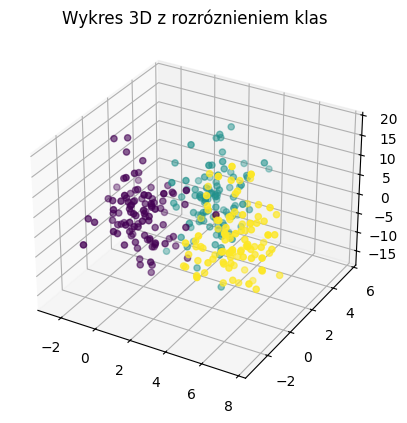

In [2]:
#dane oraz ich wizualizacja
data = pd.read_csv("./PCA_three_clusters_data.csv")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['x'], data['y'], data['z'],c = data['class'])
ax.set_title("Wykres 3D z rozróznieniem klas")
plt.show()

Jak widać, dane są już początkowo dosyć łatwo "rozróżnianlne" pomiędzy poszczególnymi klasami

In [3]:
#przejście do PCA, będziemy jednak początkowo musieli unormować dane
from sklearn.preprocessing import StandardScaler

data_class = data['class']
org_data = data
data = data.drop(columns = ['class'])

#normalzacja
skalowanie = StandardScaler()
data = skalowanie.fit_transform(data)

#macierz obserwacji
X = skalowanie.fit_transform(data)

#teraz będziemy robić PCA
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

#Principal components
print(pca.components_)



[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]


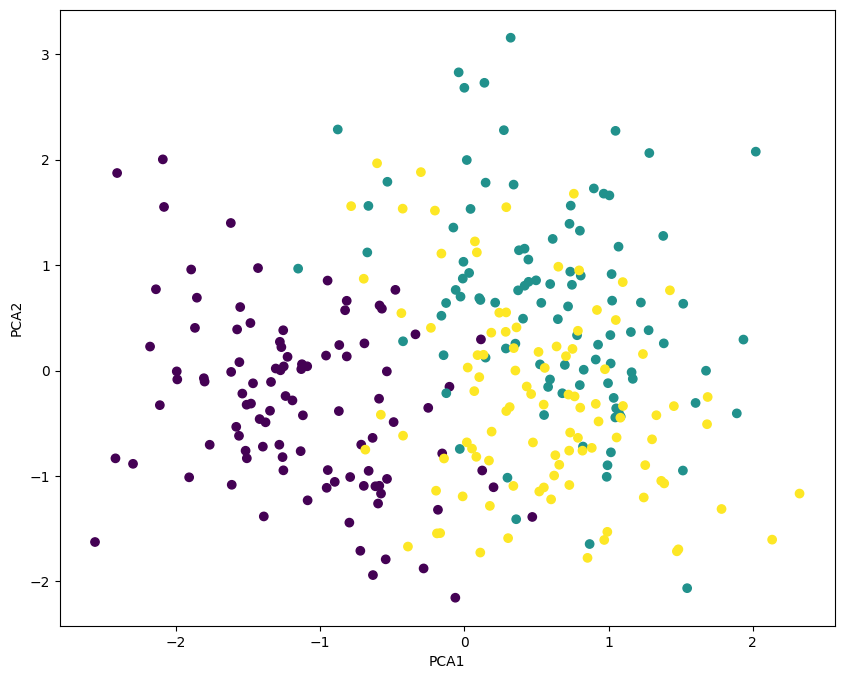

In [4]:
#plotujemy wyniki po zastosowaniu PCA
plt.figure(figsize=(10, 8))
PCA_col = pd.DataFrame(XV, columns = ["PCA1", "PCA2"])
PCA_col['class'] = data_class
plt.scatter(PCA_col['PCA1'], PCA_col['PCA2'], c = PCA_col['class'])  
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Jak widać ciężko powiedzieć czy PCA lepiej pozowliło odseparować poszczególne dane. Widać, że mamy mniejsze "chury", ale dane klasowe i tak są mocno wymieszane.

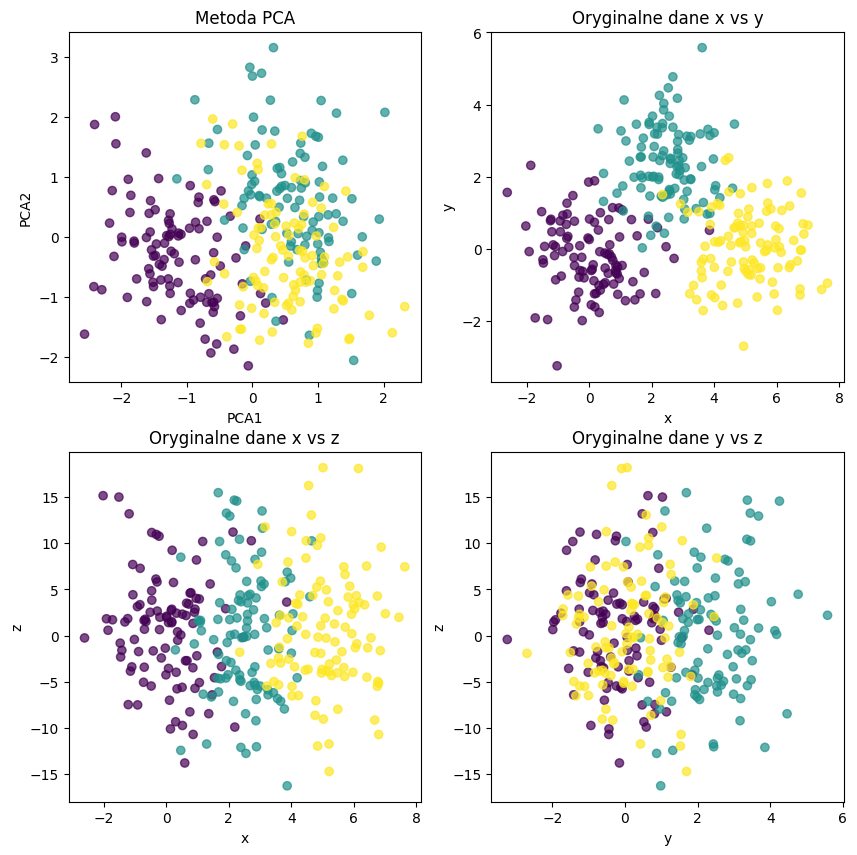

In [5]:
#teraz będziemy plotować oryginalne dane
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
axs[0,0].scatter(PCA_col['PCA1'], PCA_col['PCA2'], c = PCA_col['class'], alpha = 0.7)
axs[0,0].set_title("Metoda PCA")
axs[0,0].xaxis.set_label_text('PCA1')
axs[0,0].yaxis.set_label_text('PCA2')

axs[0,1].scatter(org_data["x"], org_data["y"], c = org_data["class"], alpha = 0.7)
axs[0,1].set_title("Oryginalne dane x vs y")
axs[0,1].xaxis.set_label_text('x')
axs[0,1].yaxis.set_label_text('y')

axs[1,1].scatter(org_data["y"], org_data["z"], c = org_data["class"], alpha = 0.7)
axs[1,1].set_title("Oryginalne dane y vs z")
axs[1,1].xaxis.set_label_text('y')
axs[1,1].yaxis.set_label_text('z')

axs[1,0].scatter(org_data["x"], org_data["z"], c = org_data["class"], alpha = 0.7)
axs[1,0].set_title("Oryginalne dane x vs z")
axs[1,0].xaxis.set_label_text('x')
axs[1,0].yaxis.set_label_text('z')

plt.show()

Jak widać najlepiej "odseparowne" są dane początkowe w przypadku gdy weźmiemy tylko kolumny x i y. "Odseparowanie" jest wtedy najlepsze

Od tego momentu przeprowadzimy PCA bez standaryzacji danych

In [6]:
#PCA bez uśredniania i skalowania

data = pd.read_csv("./PCA_three_clusters_data.csv")
data_class = data['class']
org_data = data
data = data.drop(columns = ['class'])

#teraz będziemy robić PCA
pca = PCA(n_components = 2)
XV = pca.fit_transform(data)

#Principal components
print(pca.components_)



[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]


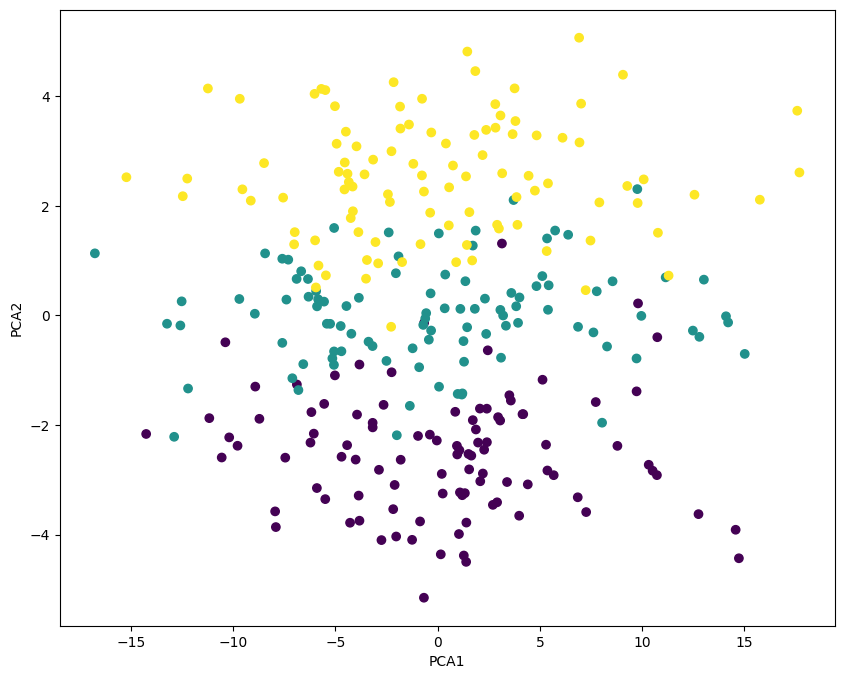

In [7]:
#plotujemy wyniki po zastosowaniu PCA
plt.figure(figsize=(10, 8))
PCA_col = pd.DataFrame(XV, columns = ["PCA1", "PCA2"])
PCA_col['class'] = data_class
plt.scatter(PCA_col['PCA1'], PCA_col['PCA2'], c = PCA_col['class'])  
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [8]:
#PCA bez skalowania

data = pd.read_csv("./PCA_three_clusters_data.csv")
data_class = data['class']
org_data = data
data = data.drop(columns = ['class'])
X = data - np.mean(data, axis = 0)
#teraz będziemy robić PCA
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

#Principal components
print(pca.components_)



[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]


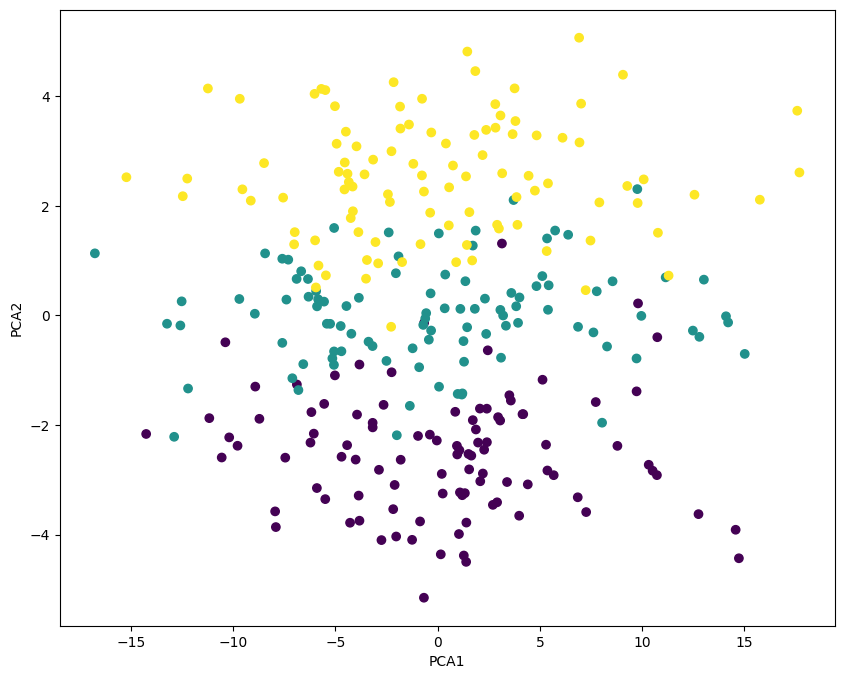

In [9]:
#plotujemy wyniki po zastosowaniu PCA
plt.figure(figsize=(10, 8))
PCA_col = pd.DataFrame(XV, columns = ["PCA1", "PCA2"])
PCA_col['class'] = data_class
plt.scatter(PCA_col['PCA1'], PCA_col['PCA2'], c = PCA_col['class'])  
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()